In [199]:
import pandas as pd
import numpy as np

In [200]:
df = pd.read_csv('MonthWiseMarketArrivals_Clean.csv')

In [201]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [202]:
df.shape

(10227, 10)

In [203]:
df_Mum = df[df.city == 'MUMBAI']

In [204]:
df_Mum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 6654 to 6799
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    146 non-null    object
 1   month     146 non-null    object
 2   year      146 non-null    int64 
 3   quantity  146 non-null    int64 
 4   priceMin  146 non-null    int64 
 5   priceMax  146 non-null    int64 
 6   priceMod  146 non-null    int64 
 7   state     146 non-null    object
 8   city      146 non-null    object
 9   date      146 non-null    object
dtypes: int64(5), object(5)
memory usage: 12.5+ KB


In [205]:
df_Mum['date'] = pd.to_datetime(df.date)

In [206]:
df_Mum.sort_values(by='date') 

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01
6667,MUMBAI,February,2004,239350,614,834,736,MS,MUMBAI,2004-02-01
6680,MUMBAI,March,2004,238000,436,557,498,MS,MUMBAI,2004-03-01
6692,MUMBAI,April,2004,198200,346,475,397,MS,MUMBAI,2004-04-01
6704,MUMBAI,May,2004,166430,357,466,405,MS,MUMBAI,2004-05-01
...,...,...,...,...,...,...,...,...,...,...
6775,MUMBAI,October,2015,284078,3178,4144,3748,MS,MUMBAI,2015-10-01
6787,MUMBAI,November,2015,308071,2118,3291,2623,MS,MUMBAI,2015-11-01
6799,MUMBAI,December,2015,302409,1027,1877,1542,MS,MUMBAI,2015-12-01
6666,MUMBAI,January,2016,413681,654,1473,1215,MS,MUMBAI,2016-01-01


## Q1. Get the modal price of onion for each month for the Mumbai market

In [207]:
df_Mum.set_index(df_Mum.date, inplace=True)

In [208]:
df_Mum.sort_index(inplace=True)

In [209]:
dff = df_Mum['priceMod']

In [210]:
dff = pd.DataFrame(dff)

In [211]:
dff

,priceMod
date,
2004-01-01,849
2004-02-01,736
2004-03-01,498
2004-04-01,397
2004-05-01,405
...,...
2015-10-01,3748
2015-11-01,2623
2015-12-01,1542


In [212]:
import matplotlib.pyplot as plt

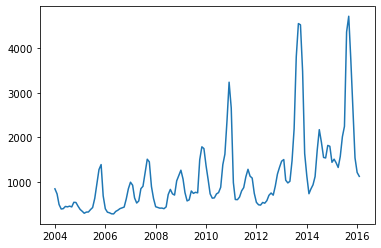

In [213]:
plt.plot(dff)

In [214]:
from statsmodels.tsa.stattools import adfuller

In [215]:
adfuller(dff)

(-4.437736321058303,
 0.00025436714348672806,
 2,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 1909.6057017652388)

In [216]:
def adfuller_test(val):
    
    result = adfuller(val)
    
    labels = ['ADF Test Statistic','p-value','Lags','Number of Observations Used']
    
    for value,label in zip(result,labels):
        
        print(label+' : '+str(value))
        
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


adfuller_test(dff)

ADF Test Statistic : -4.437736321058303
p-value : 0.00025436714348672806
Lags : 2
Number of Observations Used : 143
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


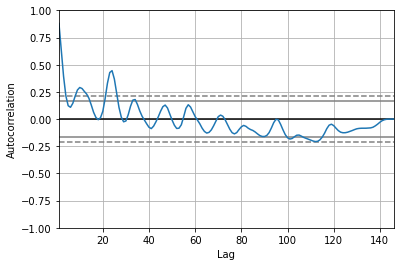

In [217]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dff)

## Q3. Plot ACF and PACF plots

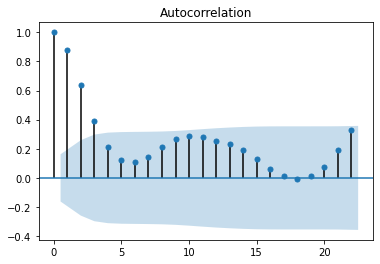

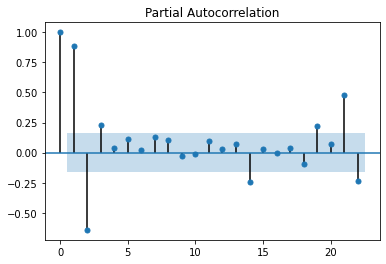

In [252]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(dff['priceMod'].dropna())
plot_pacf(dff['priceMod'].dropna())
plt.show()

In [218]:
dff['1st Differencing'] = dff - dff.shift(1)
adfuller_test(dff['1st Differencing'].dropna())

ADF Test Statistic : -7.304890903904001
p-value : 1.309339350081912e-10
Lags : 6
Number of Observations Used : 138
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


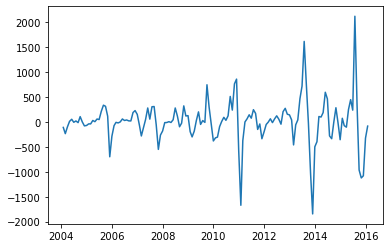

In [219]:
plt.plot(dff['1st Differencing'].dropna())

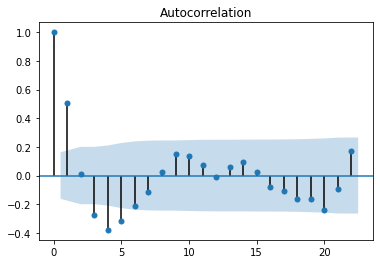

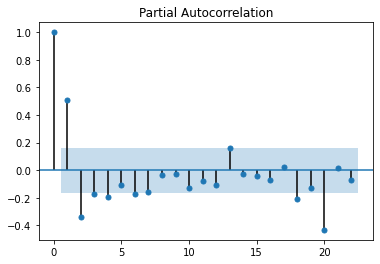

In [220]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(dff['1st Differencing'].dropna())
plot_pacf(dff['1st Differencing'].dropna())
plt.show()

In [154]:
#acf(MA) = 1
#pacf(AR) = 1

In [221]:
dff

,priceMod,1st Differencing
date,,
2004-01-01,849,NaN
2004-02-01,736,-113.0
2004-03-01,498,-238.0
2004-04-01,397,-101.0
2004-05-01,405,8.0
...,...,...
2015-10-01,3748,-966.0
2015-11-01,2623,-1125.0
2015-12-01,1542,-1081.0


In [222]:
train = dff['priceMod'][:98].astype('float64')
test = dff['priceMod'][98:].astype('float64')

## Q2. Build time series model and check the performance of the model using RMSE

In [267]:
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

X = dff
train = dff['priceMod'][:120].astype('float64')
test  = dff['priceMod'][120:].astype('float64')

df_perf = []
for i in range(4):
    for j in range(2):
        model = ARMA(train.dropna(), order=(i, j)).fit()
        #preds = model.predict(89,98)
        predictions = model.predict(start=len(train), end=len(train)+len(test)-1)
        df_perf.append([i,j,np.sqrt(mean_squared_error(test, predictions))])
        
pd.DataFrame(df_perf,columns = ['AR (p)','MA (q)','RMSE'])

,AR (p),MA (q),RMSE
0,0,0,1331.541514
1,0,1,1330.509537
2,1,0,1276.757970
3,1,1,1337.279666
4,2,0,1521.772278
5,2,1,1448.062484
6,3,0,1422.321686
7,3,1,1423.083308


In [268]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               priceMod   No. Observations:                  120
Model:                     ARMA(3, 1)   Log Likelihood                -840.605
Method:                       css-mle   S.D. of innovations            263.315
Date:                Sun, 17 Jan 2021   AIC                           1693.210
Time:                        17:31:12   BIC                           1709.935
Sample:                    01-01-2004   HQIC                          1700.002
                         - 12-01-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            917.5681    128.816      7.123      0.000     665.093    1170.043
ar.L1.priceMod     1.6405      0.855      1.919      0.055      -0.035       3.316
ar.L2.priceMod    -1.0221      1.322     -0.773      0.439      -3.612       1.568
ar.L3.priceMod     0.1931      0.672      0.287      0.774      -1.125       1.511
ma.L1.priceMod     0.0082      0.880      0.009      0.993      -1.717       1.733
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1057           -0.6766j            1.2963           -0.0874
AR.2            1.1057           +0.6766j            1.2963            0.0874
AR.3            3.0818           -0.0000j            3.0818           -0.0000
MA.1         -122.0379           +0.0000j          122.0379            0.5000
-----------------------------------------------------------------------------
"""

In [269]:
model = ARMA(train.dropna(), order=(2, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               priceMod   No. Observations:                  120
Model:                     ARMA(2, 0)   Log Likelihood                -842.427
Method:                       css-mle   S.D. of innovations            267.202
Date:                Sun, 17 Jan 2021   AIC                           1692.854
Time:                        17:31:12   BIC                           1704.004
Sample:                    01-01-2004   HQIC                          1697.382
                         - 12-01-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            906.9565    105.225      8.619      0.000     700.720    1113.193
ar.L1.priceMod     1.5358      0.070     22.059      0.000       1.399       1.672
ar.L2.priceMod    -0.7682      0.072    -10.622      0.000      -0.910      -0.626
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9997           -0.5500j            1.1410           -0.0801
AR.2            0.9997           +0.5500j            1.1410            0.0801
-----------------------------------------------------------------------------
"""

<Figure size 720x720 with 0 Axes>

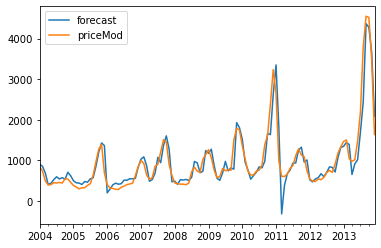

In [270]:
plt.figure(figsize=(10,10))
model.plot_predict()
plt.show()

In [271]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train, order = (2,1,0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.priceMod   No. Observations:                  119
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -842.328
Method:                       css-mle   S.D. of innovations            285.898
Date:                Sun, 17 Jan 2021   AIC                           1692.656
Time:                        17:31:16   BIC                           1703.772
Sample:                    02-01-2004   HQIC                          1697.170
                         - 12-01-2013                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.3143     41.345      0.129      0.898     -75.720      86.349
ar.L1.D.priceMod     0.8398      0.088      9.531      0.000       0.667       1.013
ar.L2.D.priceMod    -0.4771      0.091     -5.234      0.000      -0.656      -0.298
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8801           -1.1495j            1.4477           -0.1460
AR.2            0.8801           +1.1495j            1.4477            0.1460
-----------------------------------------------------------------------------
"""

In [272]:
preds = model.predict(start=len(train), end=len(train)+len(test)-1)

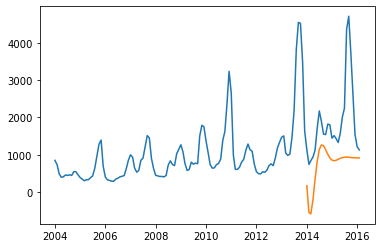

In [278]:
figi, ax = plt.subplots()
ax.plot(dff['priceMod'])
ax.plot(predictions)

In [274]:
import statsmodels.api as sm

In [275]:
model1= sm.tsa.statespace.SARIMAX(dff['priceMod'],order=(2, 1, 0),seasonal_order=(2,1,0,12)).fit()

In [276]:
pred = model.predict(start=len(train), end=len(train)+len(test)-1)


In [261]:
x = model1.forecast(15, alpha=0.05)
x.values

array([1149.28506558, 1168.80415612, 1284.19547056, 1810.55231548,
       2316.39845507, 2789.45361327, 2806.66460503, 2683.7263715 ,
       2470.99044376, 1868.15058837, 1476.99848681, 1410.28768625,
       1389.98416221, 1347.71393511, 1563.05549274])

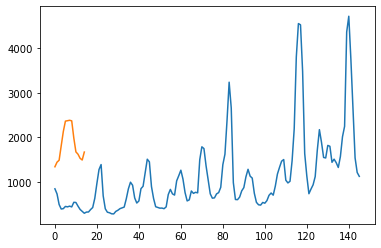

In [246]:
plt.plot(dff['priceMod'].values)
plt.plot(x.values)
plt.show()

In [109]:
# Exponencial Smoothing

## Q4. Exponential smoothing using Holt-Winter’s technique and Forecast onion price for Mumbai market

In [279]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [280]:
ets = ExponentialSmoothing(train).fit()

In [281]:
forcast = ets.forecast(steps = len(test))

In [282]:
pd.DataFrame(forcast).set_index(test.index)

,0
date,
2014-01-01,1639.0
2014-02-01,1639.0
2014-03-01,1639.0
2014-04-01,1639.0
2014-05-01,1639.0
2014-06-01,1639.0
2014-07-01,1639.0
2014-08-01,1639.0
2014-09-01,1639.0


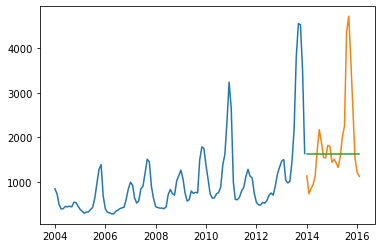

In [283]:
figi, ax = plt.subplots()
ax.plot(train)
ax.plot(test)
ax.plot(forcast)